# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

In [1]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

In [2]:
import requests
import pandas as pd
import numpy as np
import bs4
from bs4 import BeautifulSoup

In [3]:
r = requests.get(URL)

In [4]:
r

<Response [200]>

In [5]:
r.content

'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta http-equiv="content-type" content="text/html;charset=UTF-8">\n<!-- pll --><script type="text/javascript" src="/s/4a89ac5/en_US.js"></script>\n<link href="/s/a6a334e/jobsearch_all.css" rel="stylesheet" type="text/css">\n<link rel="alternate" type="application/rss+xml" title="Data Scientist $20,000 Jobs, Employment in New York State" href="http://rss.indeed.com/rss?q=data+scientist+%2420%2C000&l=New+York">\n<link rel="alternate" media="handheld" href="/m/jobs?q=data+scientist+%2420%2C000&l=New+York">\n<script type="text/javascript">\n    \n    window[\'closureReadyCallbacks\'] = [];\n\n    function call_when_jsall_loaded(cb) {\n        if (window[\'closureReady\']) {\n            cb();\n        } else {\n            window[\'closureReadyCallbacks\'].push(cb);\n        }\n    }\n</script>\n\n<script type="text/javascript" src="/s/0579f05/jobsearch-all-compiled.js"></script>\n            <script type="text/javascript">\nvar pingUrlsForGA = 

In [6]:
g_soup = BeautifulSoup(r.content)

//anaconda/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [7]:
print(g_soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <!-- pll -->
  <script src="/s/4a89ac5/en_US.js" type="text/javascript">
  </script>
  <link href="/s/a6a334e/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="http://rss.indeed.com/rss?q=data+scientist+%2420%2C000&amp;l=New+York" rel="alternate" title="Data Scientist $20,000 Jobs, Employment in New York State" type="application/rss+xml"/>
  <link href="/m/jobs?q=data+scientist+%2420%2C000&amp;l=New+York" media="handheld" rel="alternate"/>
  <script type="text/javascript">
   window['closureReadyCallbacks'] = [];

    function call_when_jsall_loaded(cb) {
        if (window['closureReady']) {
            cb();
        } else {
            window['closureReadyCallbacks'].push(cb);
        }
    }
  </script>
  <script src="/s/0579f05/jobsearch-all-compiled.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   var pingUrlsForGA = [];

v

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element="jobTitle`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- Make sure these functions are robust and can handle cases where the data/field may not be available.
- Test the functions on the results above

In [8]:
# job title
def extract_jobtitle_from_result(result):
    jobtitle = result.find('a', class_ = 'jobtitle')
    if jobtitle != None:
        jobtitle = result.find('a',class_ = 'jobtitle').text.strip().encode('ascii','ignore')
    else:
        jobtitle = result.find('a').text.encode('ascii','ignore')
    return str(jobtitle)

In [9]:
# company
def extract_company_from_result(result):
    company = result.find('span', class_ = 'company')
    if company != None:
        company = result.find('span',class_ = 'company').text.strip().encode('ascii','ignore')
    else:
        company = result.find('span').text.encode('ascii','ignore')
    return str(company)

In [10]:
# salary
def extract_salary_from_result(result):
    salary = result.find('nobr')
    if salary != None:
        salary = result.find('nobr').text.strip()
    else:
        salary = np.nan
    return str(salary)

In [11]:
# location
def extract_location_from_result(result):
    location = result.find('span', class_ = 'location')
    if location != None:
        location = result.find('span',class_ = 'location').text.strip().encode('ascii','ignore')
    else:
        location = result.find('span').text.encode('ascii','ignore')
    return str(location)

In [12]:
# function to run beautifulsoup to use in conjunction with the four functions above in a for loop below
def get_soup(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, "lxml")
    return soup

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

#### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [13]:
url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={city}&start={start}"
max_results_per_city = 300

# create five lists for the four items pulled from Indeed as well as a Clean Location field that only includes the 
# location that was used as a search term
job_title = []
company = []
location = []
location_clean = []
salary = []

# for each of the 13 cities in the for loop below, run the five functions defined above to pull Indeed results
for city in set (['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Atlanta', 'Seattle', 'Miami', 
                  'Los+Angeles','Boston','Philadelphia','Washington+DC','San+Diego','Raleigh']):
    URL1 = (url_template.replace('{city}',city))
    for start in range(0,max_results_per_city,10):
        URL2 = URL1.replace('{start}',str(start))
        soup = get_soup(URL2)
        for element in soup.findAll('div',class_= 'result'):
            job_title.append(extract_jobtitle_from_result(element))
            company.append(extract_company_from_result(element))
            location.append(extract_location_from_result(element))
            location_clean.append(city)
            salary.append(extract_salary_from_result(element))

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [15]:
# Turn the five lists created above into a single DataFrame
df = pd.DataFrame([job_title, company, location, location_clean, salary]).T
df.columns = ['title', 'company', 'locations','location_clean','salary']
df['location_clean'] = df['location_clean'].str.replace('+',' ')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5815 entries, 0 to 5814
Data columns (total 5 columns):
title             5815 non-null object
company           5815 non-null object
locations         5815 non-null object
location_clean    5815 non-null object
salary            5815 non-null object
dtypes: object(5)
memory usage: 227.2+ KB


Lastly, we need to clean up salary data. 
1. Some of the salaries are not yearly but hourly, these will be useful to us for now
2. The salaries are given as text and usually with ranges.

#### Filter out the salaries that are not yearly (filter those that refer to hour)

In [17]:
# Remove salaries that are missing or that are not annual: monthly, weekly, daily, or hourly
annual_salary = df.loc[df['salary'] != 'nan']
annual_salary_v2 = annual_salary[annual_salary['salary'].str.contains('month') == False]
annual_salary_v3 = annual_salary_v2[annual_salary_v2['salary'].str.contains('week') == False]
annual_salary_v4 = annual_salary_v3[annual_salary_v3['salary'].str.contains('hour') == False]
annual_salary_v5 = annual_salary_v4[annual_salary_v4['salary'].str.contains('day') == False]

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [18]:
# begin to clean the salary field: remove all text and special characters
annual_salary_v5['salary_clean'] = annual_salary_v5['salary']
annual_salary_v5['salary_clean'] = annual_salary_v5['salary'].str.replace('$', '')
annual_salary_v5['salary_clean'] = annual_salary_v5['salary_clean'].str.replace('a year', '')
annual_salary_v5['salary_clean'] = annual_salary_v5['salary_clean'].str.replace(',', '')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

In [19]:
# if necessary, split any ranges listed in the scraped salary field and take the average, create a clean salary fiel
split_func = lambda x: pd.Series([i for i in (x.split(' - '))])
rev = annual_salary_v5['salary_clean'].apply(split_func)
rev.rename(columns={0:'salary_min',1:'salary_max'},inplace=True)
rev['salary_max'] = rev['salary_max'].astype(float)
rev['salary_min'] = rev['salary_min'].astype(float)
rev['avg_salary'] = rev[['salary_max', 'salary_min']].mean(axis=1)
annual_salary_v6 = pd.merge(annual_salary_v5, rev, left_index=True, right_index=True)
annual_salary_v6.head()

,title,company,locations,location_clean,salary,salary_clean,salary_min,salary_max,avg_salary
6,"Statistician (Predictive Analytics), GS-1530-1...",Department Of Education,"Washington, DC",Washington DC,"$92,145 - $141,555 a year",92145 - 141555,92145.0,141555.0,116850.0
18,Data Scientist,Selby Jennings,"Washington, DC",Washington DC,"$100,000 - $140,000 a year",100000 - 140000,100000.0,140000.0,120000.0
20,Senior Statistical Programmer,"Zachary Piper, LLC","Gaithersburg, MD",Washington DC,"$70,000 - $90,000 a year",70000 - 90000,70000.0,90000.0,80000.0
21,Lead Data Scientist,Jobspring Partners,"Washington, DC",Washington DC,"$100,000 - $110,000 a year",100000 - 110000,100000.0,110000.0,105000.0
25,Senior Statistician,Legislative Branch,"Washington, DC",Washington DC,"$81,878 - $121,525 a year",81878 - 121525,81878.0,121525.0,101701.5


### Save your results as a CSV

In [20]:
annual_salary_v6.to_csv('/Users/scgiller/DSI-Projects/week4/Project 4/Output/indeed_salaries.csv')

## Predicting salaries using Logistic Regression

#### Load in the the data of scraped salaries

In [16]:
salary = pd.read_csv('/Users/scgiller/DSI-Projects/week4/Project 4/Output/indeed_salaries.csv')

In [17]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 10 columns):
Unnamed: 0        230 non-null int64
title             230 non-null object
company           230 non-null object
locations         230 non-null object
location_clean    230 non-null object
salary            230 non-null object
salary_clean      230 non-null object
salary_min        230 non-null float64
salary_max        150 non-null float64
avg_salary        230 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 18.0+ KB


#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

In [18]:
salary['avg_salary'].median()

112500.0

In [19]:
salary['HighSalary'] = np.where(salary['avg_salary'] > 112500.0, True, False)
salary.head()

,Unnamed: 0,title,company,locations,location_clean,salary,salary_clean,salary_min,salary_max,avg_salary,HighSalary
0,6,"Statistician (Predictive Analytics), GS-1530-1...",Department Of Education,"Washington, DC",Washington DC,"$92,145 - $141,555 a year",92145 - 141555,92145.0,141555.0,116850.0,True
1,18,Data Scientist,Selby Jennings,"Washington, DC",Washington DC,"$100,000 - $140,000 a year",100000 - 140000,100000.0,140000.0,120000.0,True
2,20,Senior Statistical Programmer,"Zachary Piper, LLC","Gaithersburg, MD",Washington DC,"$70,000 - $90,000 a year",70000 - 90000,70000.0,90000.0,80000.0,False
3,21,Lead Data Scientist,Jobspring Partners,"Washington, DC",Washington DC,"$100,000 - $110,000 a year",100000 - 110000,100000.0,110000.0,105000.0,False
4,25,Senior Statistician,Legislative Branch,"Washington, DC",Washington DC,"$81,878 - $121,525 a year",81878 - 121525,81878.0,121525.0,101701.5,False


In [20]:
salary_summary = pd.pivot_table(salary, index=['location_clean'], values=['avg_salary'],
               aggfunc=[len,np.amax, np.amin, np.mean])

In [21]:
salary_summary

,len,amax,amin,mean
,avg_salary,avg_salary,avg_salary,avg_salary
location_clean,,,,
Atlanta,22.0,212500.0,34999.5,97931.636364
Austin,8.0,160000.0,35000.0,95125.000000
Boston,18.0,240000.0,63000.0,119542.194444
Chicago,28.0,200000.0,55000.0,130421.428571
Los Angeles,11.0,180000.0,34000.0,98463.636364
Miami,8.0,107500.0,32900.0,71834.375000
New York,30.0,250000.0,45000.0,130887.233333
Philadelphia,11.0,250000.0,40000.0,122755.409091


In [22]:
company_summary = pd.DataFrame(salary['company'].value_counts())

In [23]:
company_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, Workbridge Associates to Roc Search
Data columns (total 1 columns):
company    126 non-null int64
dtypes: int64(1)
memory usage: 2.0+ KB


In [24]:
company_summary.head(10)

,company
Workbridge Associates,22
All-In Analytics,13
Jobspring Partners,11
Smith Hanley Associates,10
Analytic Recruiting,8
Department Of Health And Human Services,6
Averity,5
Centers for Disease Control and Prevention,5
Selby Jennings,4
University of Miami,4


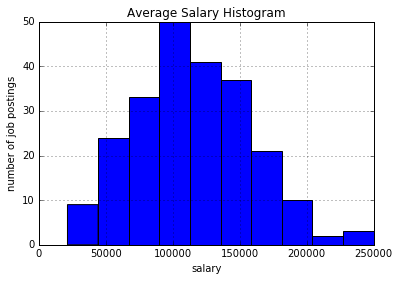

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

salary['avg_salary'].hist()
plt.ylabel('number of job postings')
plt.xlabel('salary')
plt.title('Average Salary Histogram')

#### Thought experiment: What is the baseline accuracy for this model?

In [26]:
salary['HighSalary'].value_counts()

False    116
True     114
Name: HighSalary, dtype: int64

Given that classification comes from the median of the salary field, baseline accuracy for the logistic model would be to predict half of the jobs to have salaries above the median, and half of the jobs to have salaries below the median.

#### Create a Logistic Regression model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. Display the coefficients and write a short summary of what they mean.

In [27]:
import statsmodels.api as sm

In [28]:
salary_v2 = pd.concat([salary,pd.get_dummies(salary['location_clean'])], axis = 1)

In [29]:
salary_v2['intercept'] = 1.0

In [30]:
salary_v2.head()

,Unnamed: 0,title,company,locations,location_clean,salary,salary_clean,salary_min,salary_max,avg_salary,...,Los Angeles,Miami,New York,Philadelphia,Raleigh,San Diego,San Francisco,Seattle,Washington DC,intercept
0,6,"Statistician (Predictive Analytics), GS-1530-1...",Department Of Education,"Washington, DC",Washington DC,"$92,145 - $141,555 a year",92145 - 141555,92145.0,141555.0,116850.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,18,Data Scientist,Selby Jennings,"Washington, DC",Washington DC,"$100,000 - $140,000 a year",100000 - 140000,100000.0,140000.0,120000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,20,Senior Statistical Programmer,"Zachary Piper, LLC","Gaithersburg, MD",Washington DC,"$70,000 - $90,000 a year",70000 - 90000,70000.0,90000.0,80000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,21,Lead Data Scientist,Jobspring Partners,"Washington, DC",Washington DC,"$100,000 - $110,000 a year",100000 - 110000,100000.0,110000.0,105000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,25,Senior Statistician,Legislative Branch,"Washington, DC",Washington DC,"$81,878 - $121,525 a year",81878 - 121525,81878.0,121525.0,101701.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [31]:
# Create list of independent variables, making sure to drop one of the new location dummies
train_cols = salary_v2.columns[12:]
train_cols

Index([u'Austin', u'Boston', u'Chicago', u'Los Angeles', u'Miami', u'New York',
       u'Philadelphia', u'Raleigh', u'San Diego', u'San Francisco', u'Seattle',
       u'Washington DC', u'intercept'],
      dtype='object')

In [32]:
### specify the model
logit = sm.Logit(salary_v2['HighSalary'], salary_v2[train_cols])

In [33]:
### print model summary ###
result = logit.fit()
result.summary2()

         Current function value: 0.591670
         Iterations: 35


//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.146     
Dependent Variable:  HighSalary        AIC:               298.1681  
Date:                2016-07-08 08:29  BIC:               342.8631  
No. Observations:    230               Log-Likelihood:    -136.08   
Df Model:            12                LL-Null:           -159.42   
Df Residuals:        217               LLR p-value:       5.3332e-06
Converged:           0.0000            Scale:             1.0000    
No. Iterations:      35.0000                                        
--------------------------------------------------------------------
               Coef.    Std.Err.    z    P>|z|    [0.025     0.975] 
--------------------------------------------------------------------
Austin          0.4700    0.8732  0.5382 0.5904    -1.2415    2.1815
Boston          0.7577    0.6739  1.1243 0.2609    -0.5632    2.0785
Chicago         1.8971    0.6357  2.9841 0.0028     0.6511    3.1431
Los Angeles    -0.5232    0.9167 -0.5708 0.5681    -2.3199    1.2734
Miami         -16.7407 2492.5451 -0.0067 0.9946 -4902.0393 4868.5579
New York        1.3863    0.6067  2.2851 0.0223     0.1972    2.5754
Philadelphia    1.1632    0.7719  1.5069 0.1318    -0.3498    2.6761
Raleigh         0.3930    0.7350  0.5347 0.5928    -1.0476    1.8337
San Diego      -0.4055    1.2162 -0.3334 0.7388    -2.7892    1.9783
San Francisco   2.3671    0.7360  3.2163 0.0013     0.9246    3.8096
Seattle         3.1781    1.1577  2.7451 0.0060     0.9090    5.4471
Washington DC   0.7577    0.5649  1.3412 0.1799    -0.3496    1.8650
intercept      -0.9808    0.4787 -2.0489 0.0405    -1.9191   -0.0426
====================================================================

"""

The fit of a logistic regression of job location on a classification of salary above or below the median is not very strong, as explained by r-squared. As expected, Seattle, San Francisco, Chicago, and New York offer the highest salaries for Data Scientists. While not significant, it is notable that Miami has a coefficient so strongly negative. Looking at the raw data, there are only eight job postings with salary information in Miami, and each salary is below the median for the dataset.

#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title 
- or whether 'Manager' is in the title. 
- Then build a new Logistic Regression model with these features. Do they add any value? 


In [34]:
# Find all jobs that include the word SENIOR, create dummies and limit new dataset to only original index and dummy
senior = salary_v2[salary_v2['title'].str.contains('Senior', na=False)]
senior['senior'] = 1.0
senior_v2 = senior['senior']

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [35]:
# Find all jobs that include the word MANAGER, create dummies and limit new dataset to only original index and dummy
manager = salary_v2[salary_v2['title'].str.contains('Manager', na=False)]
manager['manager'] = 1.0
manager_v2 = manager['manager']

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [36]:
# Find all jobs that include the word SCIENTIST, create dummies and limit new dataset to only original index and dummy
scientist = salary_v2[salary_v2['title'].str.contains('Scientist', na=False)]
scientist['scientist'] = 1.0
scientist_v2 = scientist['scientist']

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [37]:
# merge on all new dummies
salary_v3 = pd.concat([salary_v2,senior_v2,manager_v2,scientist_v2], axis = 1)

In [38]:
# replace missing values with zeros for regression
salary_v3['senior'].fillna(0, inplace=True)
salary_v3['manager'].fillna(0, inplace=True)
salary_v3['scientist'].fillna(0, inplace=True)
salary_v3.head()

,Unnamed: 0,title,company,locations,location_clean,salary,salary_clean,salary_min,salary_max,avg_salary,...,Philadelphia,Raleigh,San Diego,San Francisco,Seattle,Washington DC,intercept,senior,manager,scientist
0,6,"Statistician (Predictive Analytics), GS-1530-1...",Department Of Education,"Washington, DC",Washington DC,"$92,145 - $141,555 a year",92145 - 141555,92145.0,141555.0,116850.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,18,Data Scientist,Selby Jennings,"Washington, DC",Washington DC,"$100,000 - $140,000 a year",100000 - 140000,100000.0,140000.0,120000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,20,Senior Statistical Programmer,"Zachary Piper, LLC","Gaithersburg, MD",Washington DC,"$70,000 - $90,000 a year",70000 - 90000,70000.0,90000.0,80000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,21,Lead Data Scientist,Jobspring Partners,"Washington, DC",Washington DC,"$100,000 - $110,000 a year",100000 - 110000,100000.0,110000.0,105000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,25,Senior Statistician,Legislative Branch,"Washington, DC",Washington DC,"$81,878 - $121,525 a year",81878 - 121525,81878.0,121525.0,101701.5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [39]:
# create new set of independent variables that includes new dummies
train_cols2 = salary_v3.columns[12:]

In [40]:
logit2 = sm.Logit(salary_v3['HighSalary'], salary_v3[train_cols2])

In [41]:
### print model summary ###
result = logit2.fit()
result.summary2()

         Current function value: 0.527833
         Iterations: 35


//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.238     
Dependent Variable:    HighSalary          AIC:                 274.8031  
Date:                  2016-07-08 08:30    BIC:                 329.8124  
No. Observations:      230                 Log-Likelihood:      -121.40   
Df Model:              15                  LL-Null:             -159.42   
Df Residuals:          214                 LLR p-value:         3.6912e-10
Converged:             0.0000              Scale:               1.0000    
No. Iterations:        35.0000                                            
--------------------------------------------------------------------------
               Coef.     Std.Err.     z    P>|z|     [0.025       0.975]  
--------------------------------------------------------------------------
Austin         -0.0131      0.9586 -0.0137 0.9891      -1.8920      1.8658
Boston         -0.0872      0.7372 -0.1183 0.9058      -1.5321      1.3576
Chicago         1.4860      0.6718  2.2119 0.0270       0.1692      2.8028
Los Angeles    -0.9598      1.0046 -0.9554 0.3394      -2.9289      1.0092
Miami         -25.4792 111613.8741 -0.0002 0.9998 -218784.6525 218733.6941
New York        0.8586      0.6440  1.3333 0.1824      -0.4036      2.1207
Philadelphia    0.7191      0.8190  0.8780 0.3800      -0.8862      2.3243
Raleigh         0.4253      0.7694  0.5528 0.5804      -1.0827      1.9332
San Diego      -0.8066      1.3263 -0.6082 0.5431      -3.4061      1.7929
San Francisco   1.4063      0.7936  1.7721 0.0764      -0.1491      2.9617
Seattle         2.7382      1.1998  2.2822 0.0225       0.3866      5.0898
Washington DC   0.3721      0.6034  0.6168 0.5374      -0.8104      1.5547
intercept      -1.4309      0.5180 -2.7622 0.0057      -2.4462     -0.4156
senior          1.6419      0.5187  3.1651 0.0016       0.6252      2.6586
manager         0.3683      1.0004  0.3682 0.7127      -1.5924      2.3290
scientist       1.3300      0.3324  4.0008 0.0001       0.6784      1.9815
==========================================================================

"""

Adding in flags for the words "senior, manager, and scientist" improved the model somewhat, although the relationship between location and salary is still not very strong. Both "senior" and "scientist" both had a strong, statistically significant positive effect on expected salary. As in the previous model, Seattle appears to be the city with the highest paying job listings.

#### Rebuild this model with scikit-learn.
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

In [43]:
# Assign appropriate independent and dependant variables
x = salary_v3[train_cols2]
y = salary_v3['HighSalary']

In [44]:
# Split the data using TTS
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=77)

In [45]:
# Run the sklearn version of a logistic regression
lr = LogisticRegression(solver='liblinear')

In [46]:
# train model using training datasets
lr_model = lr.fit(X_train, y_train)

In [47]:
# predict on test dataset using model results
lr_ypred = lr_model.predict(X_test)

In [48]:
# create confusion matrix to show difference between predicted and actuals
lr_cm = confusion_matrix(y_test, lr_ypred, labels=lr.classes_)
lr_cm = pd.DataFrame(lr_cm, columns=lr.classes_, index=lr.classes_)
lr_cm

,False,True
False,27,11
True,9,29


In [49]:
print(classification_report(y_test, lr_ypred, labels=lr.classes_))

             precision    recall  f1-score   support

      False       0.75      0.71      0.73        38
       True       0.72      0.76      0.74        38

avg / total       0.74      0.74      0.74        76



The precision score represents the model's ability to not label a positive an observation that is negative. The recall scores represents the number of all predicted true observations as a percentage of all actual true observations. The F1-score is the weighted average of the precision and recall scores. All scores in our model fall between .71 and .76.

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy, AUC, precision and recall of the model. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.

In [50]:
cross_val_score(lr, x, y, cv=5).mean()

0.54397574262514126

The average of 5 different cross val scores is .54, a clear improvement from our earlier models (r-squared of .15 and .23)

In [51]:
from sklearn.metrics import roc_curve
#It takes probability of predicted value as an input:

proba = lr_model.predict_proba(salary_v3[train_cols2]).T[1]


roc = roc_curve(y, proba)

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

def getROCcurve(roc, title='ROC Curve', xlabel ='% of False Positives', ylabel = '% of True Positives'):
    
    fpr, tpr, thresholds = roc
    
    fig,ax = plt.subplots()
    ax.plot(fpr, tpr, label='ROC Curve')

    fig.set_size_inches(7, 6, forward=True)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.title(title)
    plt.legend(loc='best')

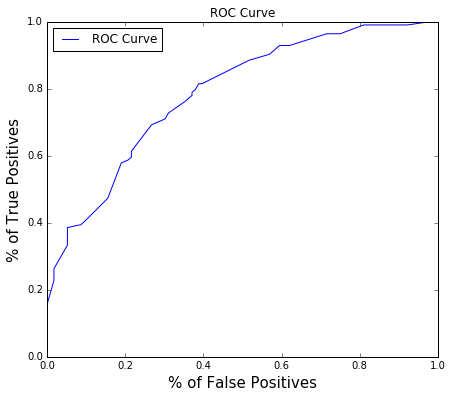

In [40]:
getROCcurve(roc)

This ROC curve displays the difference between the True Positive rate and the False Positive rate. The closer the curve is to the upper left hand corner of the plot, the better the fit of the model. 

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc

In [54]:
predictions = lr_model.predict(x)

In [55]:
accuracy_score(y, predictions)

0.70869565217391306

In [56]:
recall_score(y, predictions)

0.72807017543859653

In [57]:
precision_score(y, predictions)

0.69747899159663862

The precision score represents the model's ability to not give a positive label to an observation that is negative. The recall scores represents the number of all predicted true observations as a percentage of all actual true observations. The accuracy score represents the fraction of correct predictions.

In this scenario, I am most interested in having a high precision score. If I trying to predict whether a job will have a salary above median, I would want to make sure that the number of negative records I am including with my positive observations would be as small as possible.

#### Compare L1 and L2 regularization for this logistic regression model. What effect does this have on the coefficients learned?

In [ ]:
# L1 and L2

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=77)

In [59]:
lr1 = LogisticRegression(penalty='l1') # lasso - get coefficients down to zero if the independent var is not a good predictor
lr2 = LogisticRegression(penalty='l2') # ridge

lr1_model = lr1.fit(X_train, y_train)
lr2_model = lr2.fit(X_train, y_train)

In [60]:
print('Coefficients: ', lr1_model.coef_)

('Coefficients: ', array([[ 0.        ,  0.        ,  0.6589993 , -0.66007683, -1.78624297,
         0.07610373,  0.        ,  0.        , -0.1619744 ,  1.04743762,
         0.43392635,  0.1263207 , -0.34245546,  0.95015252,  0.        ,
         0.77512806]]))


In [61]:
print('Coefficients: ', lr2_model.coef_)

('Coefficients: ', array([[-0.34350873, -0.06009775,  0.8100548 , -0.70823438, -1.32004749,
         0.32147623,  0.07755801, -0.14693418, -0.51365969,  1.092875  ,
         0.75612078,  0.33025487, -0.37434095,  0.96406589, -0.22310844,
         0.77173083]]))


Many coefficients do not change in terms of sign and magnitude. A number of coefficients are dropped during the L1 regularization method due to lack of significance to the model.

In [62]:
y1_pred = lr1.predict(X_test)
y2_pred = lr2.predict(X_test)

In [63]:
cm1 = confusion_matrix(y_test, y1_pred, labels=lr1.classes_)
cm1 = pd.DataFrame(cm1, columns=lr1.classes_, index=lr1.classes_)

cm2 = confusion_matrix(y_test, y2_pred, labels=lr2.classes_)
cm2 = pd.DataFrame(cm2, columns=lr2.classes_, index=lr2.classes_)

In [80]:
cm1

,False,True
False,26,12
True,8,30


In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

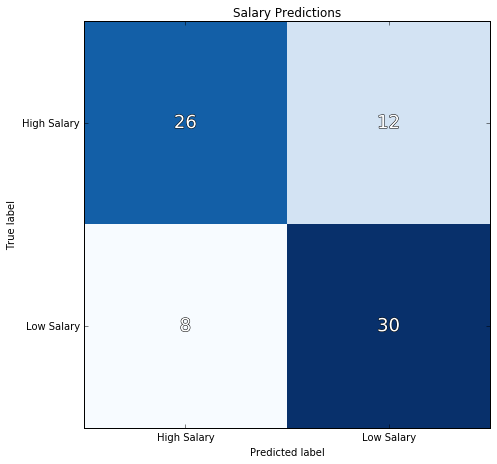

In [82]:
import matplotlib.patheffects as path_effects
def plot_confusion_matrix(cm1, title='Salary Predictions', labels=['High Salary','Low Salary'], cmap=plt.cm.Blues):
    
    plt.figure(figsize=(7,7))
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
        
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    width, height = cm1.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm1[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                                                       path_effects.Normal()])
cm1 = confusion_matrix(y_test,y1_pred)
plot_confusion_matrix(cm1)

In [83]:
predictions_lr1 = lr1_model.predict(X_test)

In [84]:
accuracy_score(y_test, predictions_lr1)

0.73684210526315785

In [85]:
recall_score(y_test, predictions_lr1)

0.78947368421052633

In [86]:
precision_score(y_test, predictions_lr1)

0.7142857142857143

In [65]:
cm2

,False,True
False,27,11
True,9,29


In [66]:
print(classification_report(y_test, y1_pred, labels=lr1.classes_))

             precision    recall  f1-score   support

      False       0.76      0.68      0.72        38
       True       0.71      0.79      0.75        38

avg / total       0.74      0.74      0.74        76



In [67]:
print(classification_report(y_test, y2_pred, labels=lr2.classes_))

             precision    recall  f1-score   support

      False       0.75      0.71      0.73        38
       True       0.72      0.76      0.74        38

avg / total       0.74      0.74      0.74        76



In [68]:
cross_val_score(lr1_model, x, y, cv=5).mean()

0.58301367046972974

In [69]:
cross_val_score(lr2_model, x, y, cv=5).mean()

0.54397574262514126

As measured by cross val score using five folds, L1 regularization does a  better job of improving the model. The mean L1 r-squared figure is .58, while the mean L2 r-squared score is .54.

In [70]:
from sklearn.metrics import roc_curve
#It takes probability of predicted value as an input:

proba = lr1_model.predict_proba(salary_v3[train_cols2]).T[1]


roc = roc_curve(y, proba)

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

def getROCcurve(roc, title='ROC Curve', xlabel ='% of False Positives', ylabel = '% of True Positives'):
    
    fpr, tpr, thresholds = roc
    
    fig,ax = plt.subplots()
    ax.plot(fpr, tpr, label='ROC Curve')

    fig.set_size_inches(7, 6, forward=True)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.title(title)
    plt.legend(loc='best')

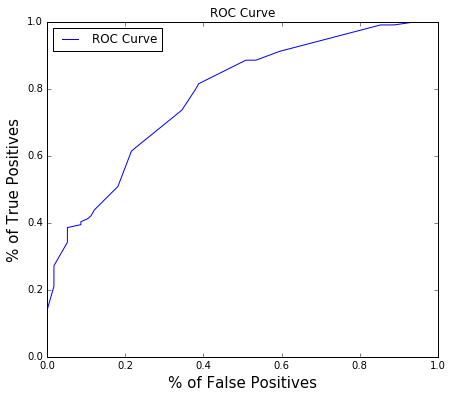

In [72]:
getROCcurve(roc)

#### Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients

In [56]:
def top_companies(x):
    if x == 'Workbridge Associates':
        return 1.0
    elif x == 'All-In Analytics':
        return 1.0
    elif x == 'Jobspring Partners':
        return 1.0
    elif x == 'Smith Hanley Associates':
        return 1.0
    else:
        return 0.0

In [57]:
salary_v3['topcompanies'] = salary_v3['company'].map(lambda x: top_companies(x))

In [58]:
train_cols3 = salary_v3.columns[12:]
logit3 = sm.Logit(salary_v3['HighSalary'], salary_v3[train_cols3])
result = logit3.fit()
result.summary2()

         Current function value: 0.523838
         Iterations: 35


//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.244     
Dependent Variable:    HighSalary          AIC:                 274.9655  
Date:                  2016-07-07 22:38    BIC:                 333.4128  
No. Observations:      230                 Log-Likelihood:      -120.48   
Df Model:              16                  LL-Null:             -159.42   
Df Residuals:          213                 LLR p-value:         4.0264e-10
Converged:             0.0000              Scale:               1.0000    
No. Iterations:        35.0000                                            
--------------------------------------------------------------------------
               Coef.     Std.Err.     z    P>|z|     [0.025       0.975]  
--------------------------------------------------------------------------
Austin          0.0179      0.9638  0.0186 0.9852      -1.8711      1.9069
Boston         -0.0806      0.7371 -0.1093 0.9129      -1.5252      1.3640
Chicago         1.2278      0.6950  1.7667 0.0773      -0.1343      2.5899
Los Angeles    -0.9639      0.9980 -0.9658 0.3341      -2.9198      0.9921
Miami         -25.5132 114703.2241 -0.0002 0.9998 -224839.7014 224788.6750
New York        0.8665      0.6403  1.3533 0.1760      -0.3885      2.1215
Philadelphia    0.6323      0.8261  0.7654 0.4440      -0.9868      2.2513
Raleigh         0.3328      0.7740  0.4300 0.6672      -1.1843      1.8499
San Diego      -0.7772      1.3218 -0.5880 0.5565      -3.3678      1.8134
San Francisco   1.3683      0.7950  1.7211 0.0852      -0.1899      2.9264
Seattle         2.6633      1.2070  2.2066 0.0273       0.2977      5.0289
Washington DC   0.3515      0.6001  0.5857 0.5580      -0.8247      1.5277
intercept      -1.4336      0.5123 -2.7983 0.0051      -2.4376     -0.4295
senior          1.5998      0.5265  3.0385 0.0024       0.5679      2.6317
manager         0.2975      1.0156  0.2930 0.7695      -1.6929      2.2880
scientist       1.2030      0.3446  3.4911 0.0005       0.5276      1.8783
topcompanies    0.5821      0.4318  1.3479 0.1777      -0.2643      1.4285
==========================================================================

"""

The addition of a Top Companies variable flagging the four companies with the most job postings did not produce a statistically significant coefficient.

#### Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary - which entries have the highest predicted salaries?

In [59]:
fake_blind = salary_v3[['Austin', 'Boston', 'Chicago', 'Los Angeles', 'Miami', 'New York',
         'Philadelphia', 'Raleigh', 'San Diego', 'San Francisco', 'Seattle',
         'Washington DC', 'intercept', 'senior', 'manager', 'scientist',
         'topcompanies']]

In [60]:
fake_blind.head()

,Austin,Boston,Chicago,Los Angeles,Miami,New York,Philadelphia,Raleigh,San Diego,San Francisco,Seattle,Washington DC,intercept,senior,manager,scientist,topcompanies
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [61]:
salary_v3['predictions'] = result.predict(fake_blind, linear=False)

In [62]:
salary_v3.head()

,Unnamed: 0,title,company,locations,location_clean,salary,salary_clean,salary_min,salary_max,avg_salary,...,San Diego,San Francisco,Seattle,Washington DC,intercept,senior,manager,scientist,topcompanies,predictions
0,6,"Statistician (Predictive Analytics), GS-1530-1...",Department Of Education,"Washington, DC",Washington DC,"$92,145 - $141,555 a year",92145 - 141555,92145.0,141555.0,116850.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.253117
1,18,Data Scientist,Selby Jennings,"Washington, DC",Washington DC,"$100,000 - $140,000 a year",100000 - 140000,100000.0,140000.0,120000.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.530192
2,20,Senior Statistical Programmer,"Zachary Piper, LLC","Gaithersburg, MD",Washington DC,"$70,000 - $90,000 a year",70000 - 90000,70000.0,90000.0,80000.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.626611
3,21,Lead Data Scientist,Jobspring Partners,"Washington, DC",Washington DC,"$100,000 - $110,000 a year",100000 - 110000,100000.0,110000.0,105000.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.668851
4,25,Senior Statistician,Legislative Branch,"Washington, DC",Washington DC,"$81,878 - $121,525 a year",81878 - 121525,81878.0,121525.0,101701.5,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.626611


Based on the model logit3, which includes all location dummy variables, the three job title search word dummy variables, and a dummy for top four potential employers, the "predictions" field included in the salary_v3 dataframe  represents the probablility that the salary the job offered would be above the median of the entire dataset (the target variable in the logit3 model.

### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate the logistic regression model using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [ ]:
## YOUR CODE HERE

In [ ]:
## YOUR CODE HERE

#### Re-test L1 and L2 regularization. You can use LogisticRegressionCV to find the optimal reguarlization parameters. 
- Re-test what text features are most valuable.  
- How do L1 and L2 change the coefficients?

In [ ]:
## YOUR CODE HERE